## Charts and Tables
- Top 10 Apps proportion of is_attributed
- Top 10 Publisher Channels proportion of is_attributed
- Histogram of median_time_diff_app by is_attributed
- Histogram of median_time_diff_channel by is_attributed
- Violin plot of time between clicks by IP
- Bar chart of Clicks by Hour grouped by is_attributed
- Cross tab heatmap for App and Publisher channel
- Cross tab heatmap for device and os

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/output/sample_data_modeling.csv')

In [6]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'click_date', 'median_time_diff_app', 'median_time_diff_channel',
       'hour', 'minute', 'hour_0_to_8', 'hour_8_to_16', 'hour_16_to_24',
       'app_encoded', 'channel_encoded', 'os_encoded', 'device_encoded', 'ctr',
       'total_clicks', 'click_time_range', 'clusters', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

### Top 10 Devices

In [7]:
top_10_device_list = list(df['device'].value_counts()[:10].index)

In [8]:
top_10_device_list

[1, 0, 2, 3032, 3543, 6, 40, 3866, 16, 18]

In [9]:
df['device_str'] = df['device'].apply(lambda x: x if x in top_10_device_list else 'Other').astype('str')

In [10]:
df['device_str'].value_counts()

1        49536
0         2375
2         2031
Other      809
3032       197
3543        72
6           57
40          51
3866        48
16          45
18          28
Name: device_str, dtype: int64

### Top 10 OS (Operating System)

In [11]:
df['os_str'] = df['os'].apply(lambda x: x if x in top_10_device_list else 'Other').astype('str')

In [12]:
df['os_str'].value_counts()

Other    48781
18        2465
6         1313
16         844
0          842
1          629
40         193
2          182
Name: os_str, dtype: int64

### Top 10 Apps

In [13]:
# get top 10 apps
df['app'].value_counts()[:10].index

Int64Index([3, 12, 2, 9, 15, 18, 19, 14, 1, 35], dtype='int64')

In [14]:
top_10_app_list = list(df['app'].value_counts()[:10].index)

In [15]:
top_10_app_list

[3, 12, 2, 9, 15, 18, 19, 14, 1, 35]

In [16]:
df['app_str'] = df['app'].apply(lambda x: x if x in top_10_app_list else 'Other').astype('str')

In [17]:
cross_tab_prop = pd.crosstab(index=df['app_str'],
                             columns=df['is_attributed'],
                             normalize="index")

In [18]:
cross_tab_prop

is_attributed,0,1
app_str,,
1,0.976142,0.023858
12,0.992884,0.007116
14,0.982274,0.017726
15,0.983183,0.016817
18,0.958904,0.041096
19,0.076531,0.923469
2,0.980773,0.019227
3,0.975835,0.024165
35,0.005848,0.994152


In [19]:
cross_tab = pd.crosstab(index=df['app_str'],
                        columns=df['is_attributed'])
cross_tab

is_attributed,0,1
app_str,,
1,1432,35
12,6000,43
14,2549,46
15,4034,69
18,3920,168
19,225,2715
2,5458,107
3,8440,209
35,7,1190


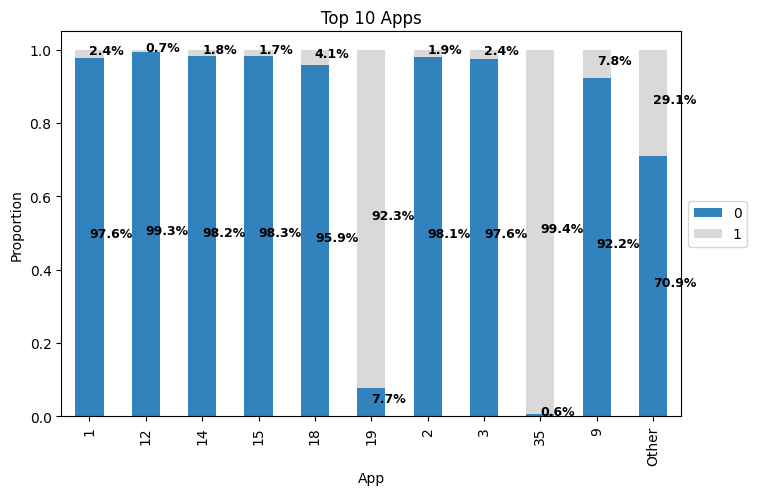

In [20]:
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab20c',
                    figsize=(8, 5))

plt.legend(loc="center left", ncol=1, bbox_to_anchor=(1, 0.5))
plt.xlabel("App")
plt.ylabel("Proportion")
plt.title("Top 10 Apps")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n,
                y=(y_loc - proportion) + (proportion / 2),
                s=f'{np.round(proportion * 100, 1)}%',
                color="black",
                fontsize=9,
                fontweight="bold")

plt.show()

### Top 10 Publisher Channels

In [21]:
top_10_channel_list = list(df['channel'].value_counts()[:10].index)

In [22]:
df['channel_str'] = df['channel'].apply(lambda x: x if x in top_10_channel_list else 'Other').astype('str')

In [23]:
cross_tab_prop2 = pd.crosstab(index=df['channel_str'],
                             columns=df['is_attributed'],
                             normalize="index")

In [24]:
cross_tab2 = pd.crosstab(index=df['channel_str'],
                        columns=df['is_attributed'])

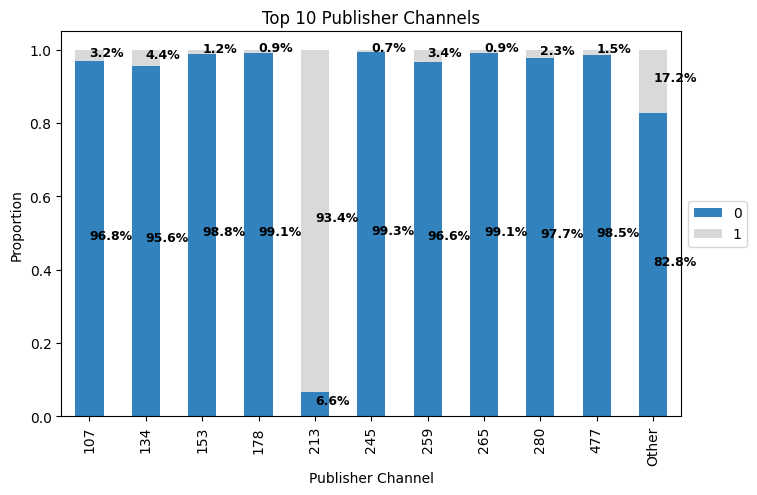

In [25]:
cross_tab_prop2.plot(kind='bar',
                    stacked=True,
                    colormap='tab20c',
                    figsize=(8, 5))

plt.legend(loc="center left", ncol=1, bbox_to_anchor=(1, 0.5))
plt.xlabel("Publisher Channel")
plt.ylabel("Proportion")
plt.title("Top 10 Publisher Channels")

for n, x in enumerate([*cross_tab2.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop2.loc[x],
                                   cross_tab_prop2.loc[x].cumsum()):
      plt.text(x=n,
          y=(y_loc - proportion) + (proportion / 2),
          s=f'{np.round(proportion * 100, 1)}%',
          color="black",
          fontsize=9,
          fontweight="bold")

plt.show()

### Histograms

In [26]:
def create_hist_subplot(nrows, df_arg, bins, yLabel, title, edgeColor, range):
    hist_sp = plt.subplot(nrows)
    hist_sp.set_title(title)
    plt.hist(df_arg, range=range, bins=bins, edgecolor='black')
    plt.ylabel(yLabel)
    plt.xlabel("Minutes")
    plt.xticks(np.arange(0,400, step=30))
    plt.show()

#### Apps - Downloaded versus Not-Downloaded

In [27]:
df['is_attrib_description'] =  df['is_attributed'].apply(lambda x: 'Not Downloaded' if x == 0 else 'Downloaded')

In [28]:
# convert median time difference columns to minutes scale
df['median_time_diff_app_mins'] = df['median_time_diff_app'] / 60

In [29]:
is_attrib_descriptions = {"Downloaded", "Not Downloaded"}

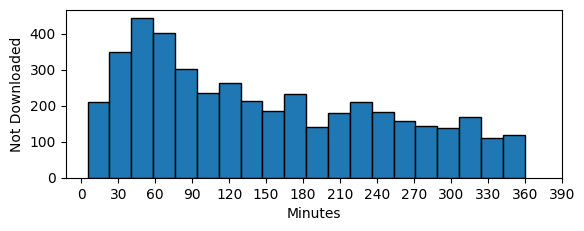

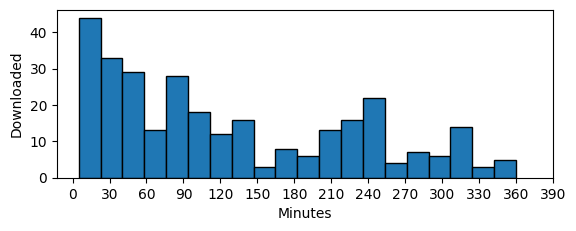

In [30]:
# App Distribution of Median Time Difference Between Clicks
bins = 20

for idx, val in enumerate(is_attrib_descriptions):
  create_hist_subplot(211, df[df.is_attrib_description==val].median_time_diff_app_mins, bins, val, "", 'black', (5, 360))

#### Channel - Downloaded versus Not-Downloaded

In [31]:
# convert median time difference columns to minutes scale
df['median_time_diff_channel_mins'] = df['median_time_diff_channel'] / 60

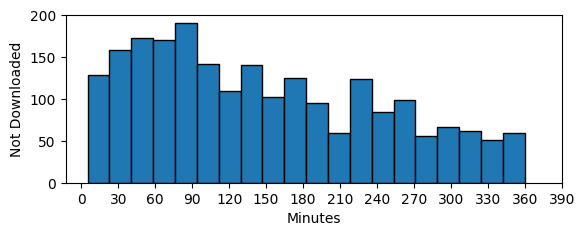

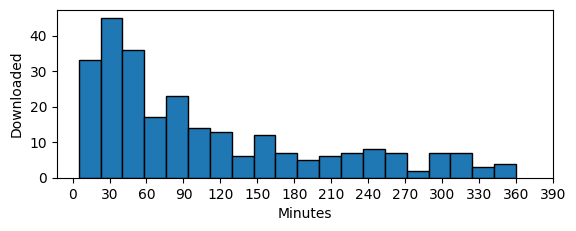

In [32]:
# Channel Distribution of Median Time Difference Between Clicks
bins = 20

for idx, val in enumerate(is_attrib_descriptions):
  create_hist_subplot(211, df[df.is_attrib_description==val].median_time_diff_channel_mins, bins, val, "", 'black', (5, 360))

### Hourly click counts

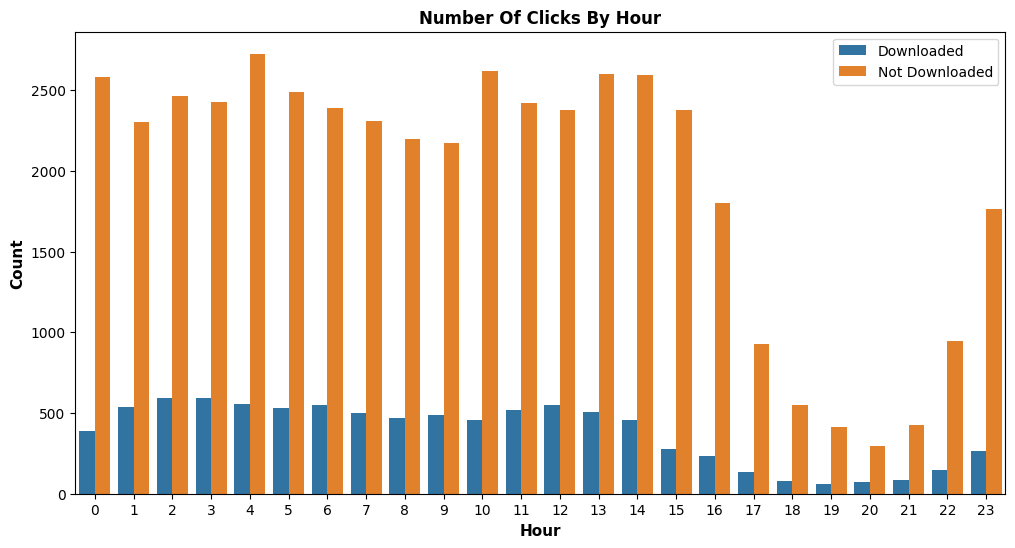

In [33]:
is_attributed_order = ['Downloaded', 'Not Downloaded']
plt.figure(figsize=[12, 6])
plt.title('Number of clicks By hour'.title(), fontsize=12, weight="bold")
ax_ret = sb.countplot(data=df, x='hour', hue='is_attrib_description', hue_order=is_attributed_order)
plt.xlabel('Hour'.title(), fontsize=11, weight="bold")
plt.ylabel('Count'.title(), fontsize=11, weight="bold")
ax_ret.legend(loc='upper right');

### Time Difference between Clicks

In [34]:
df_tbc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/data/time_diff_between_clicks.csv')

In [35]:
df_tbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55249 entries, 0 to 55248
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ip                55249 non-null  int64  
 1   app               55249 non-null  int64  
 2   device            55249 non-null  int64  
 3   os                55249 non-null  int64  
 4   channel           55249 non-null  int64  
 5   click_time        55249 non-null  object 
 6   is_attributed     55249 non-null  int64  
 7   click_date        55249 non-null  object 
 8   duration_seconds  55249 non-null  int64  
 9   duration_minutes  55249 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 4.2+ MB


In [36]:
df_tbc['duration_minutes'].describe()

count    55249.000000
mean        69.840272
std        173.700633
min          0.000000
25%          0.000000
50%          0.000000
75%         19.770000
max       1433.780000
Name: duration_minutes, dtype: float64

In [37]:
bins = [-1, 0.001, .99, 5, 10, 15, 20, 25, 30, 60, df_tbc["duration_minutes"].max()]
labels = ["0 seconds", "< 1 min.", "1 to 5 mins.", "6 to 10 mins.", "11 to 15 mins.",
          "16 to 20 mins.", "21 to 25 mins.", "26 to 30 mins.",
          "31 to 60 mins.", "> 60 mins."]

In [38]:
df_tbc["duration_group"] = pd.cut(df_tbc["duration_minutes"], bins, labels=labels)

In [39]:
df_tbc[["duration_minutes", "duration_group"]].head()

,duration_minutes,duration_group
0,0.00,0 seconds
1,146.42,> 60 mins.
2,0.00,0 seconds
3,0.00,0 seconds
4,0.00,0 seconds


In [40]:
user_count_all = df_tbc.groupby(["duration_group"])['ip'].count()

In [41]:
user_not_downloaded = df_tbc.query("is_attributed==0").groupby(["duration_group"])['ip'].count()

In [42]:
user_downloaded = df_tbc.query("is_attributed==1").groupby(["duration_group"])['ip'].count()

In [43]:
user_downloaded

duration_group
0 seconds         7673
< 1 min.            26
1 to 5 mins.        77
6 to 10 mins.       72
11 to 15 mins.      69
16 to 20 mins.      43
21 to 25 mins.      33
26 to 30 mins.      41
31 to 60 mins.     144
> 60 mins.         887
Name: ip, dtype: int64

In [44]:
df_duration_user = pd.DataFrame({"Not Downloaded": user_not_downloaded,
                                 "Downloaded": user_downloaded})

In [45]:
df_duration_user.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, 0 seconds to > 60 mins.
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Not Downloaded  10 non-null     int64
 1   Downloaded      10 non-null     int64
dtypes: int64(2)
memory usage: 550.0 bytes


In [46]:
df_duration_user.head()

,Not Downloaded,Downloaded
duration_group,,
0 seconds,30957,7673
< 1 min.,217,26
1 to 5 mins.,646,77
6 to 10 mins.,631,72
11 to 15 mins.,560,69


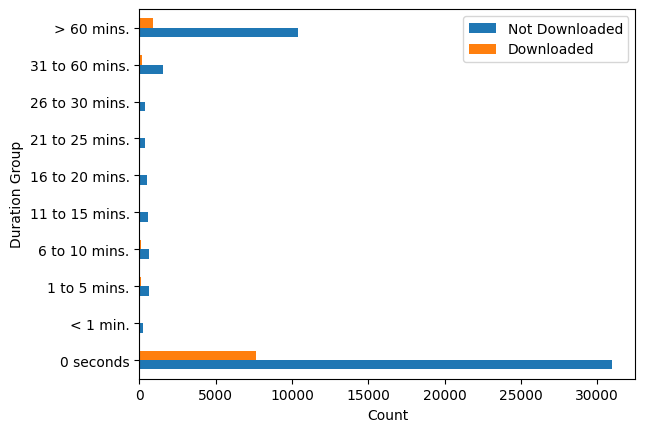

In [48]:
df_duration_user.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Duration Group')
plt.show()

In [49]:
df_duration_user_filtered = df_duration_user.loc["< 1 min.":"31 to 60 mins."]

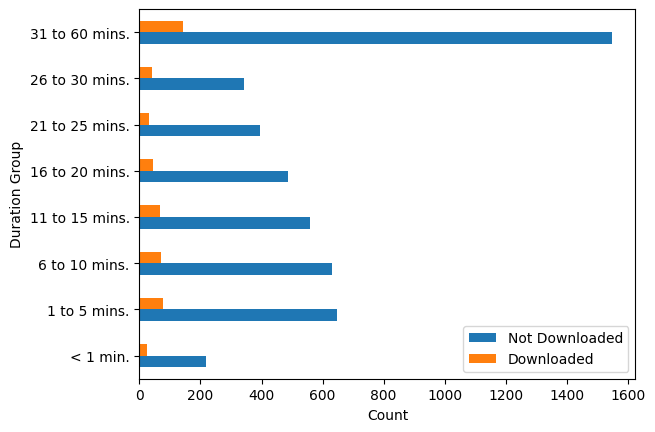

In [50]:
df_duration_user_filtered.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Duration Group')
plt.show()

In [49]:
user_count_all

duration_group
0 seconds         38630
< 1 min.            243
1 to 5 mins.        723
6 to 10 mins.       703
11 to 15 mins.      629
16 to 20 mins.      529
21 to 25 mins.      427
26 to 30 mins.      384
31 to 60 mins.     1691
> 60 mins.        11290
Name: ip, dtype: int64

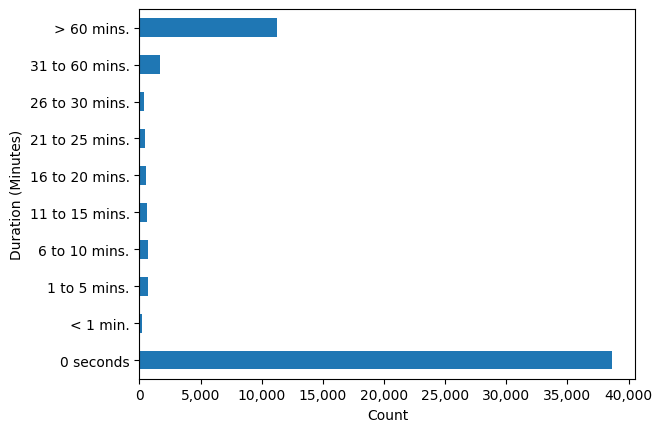

In [50]:
user_count_all.plot(kind='barh', x='duration_group')
plt.ylabel("Duration (Minutes)")
plt.xlabel("Count")
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
           labels=['0', '5,000', '10,000', '15,000', '20,000', '25,000', '30,000', '35,000', '40,000'])
plt.show()

### Violin plot for time between clicks

In [51]:
df_tbc.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'click_date', 'duration_seconds', 'duration_minutes', 'duration_group'],
      dtype='object')

In [53]:
df_tbc['App Downloaded'] =  df_tbc['is_attributed'].apply(lambda x: 'Not Downloaded' if x == 0 else 'Downloaded')

### Heatmaps

In [51]:
# correlation matrix
df_corr = df[['median_time_diff_app', 'median_time_diff_channel',
        'hour_0_to_8', 'hour_8_to_16',
        'hour_16_to_24', 'app_encoded',
        'channel_encoded', 'os_encoded', 'ctr']]

In [52]:
ct_app_channel = pd.crosstab(df["app_str"], df["channel_str"])

In [53]:
ct_device_os = pd.crosstab(df["device_str"], df["os_str"])

In [54]:
ct_clusters_app = pd.crosstab(df['clusters'], df['app_str'])
ct_clusters_channel = pd.crosstab(df['clusters'], df["channel_str"])

#### Crosstab - app and channel

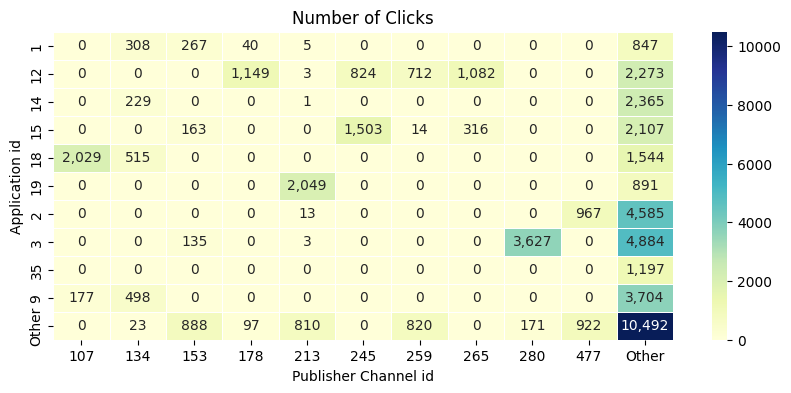

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))
sb.heatmap(ct_app_channel, annot=True, fmt=",",
            cmap="YlGnBu", cbar=True, linewidths=.5, ax=ax)
plt.ylabel("Application id")
plt.xlabel("Publisher Channel id")
plt.title("Number of Clicks")
plt.show()

#### Crosstab - device and os

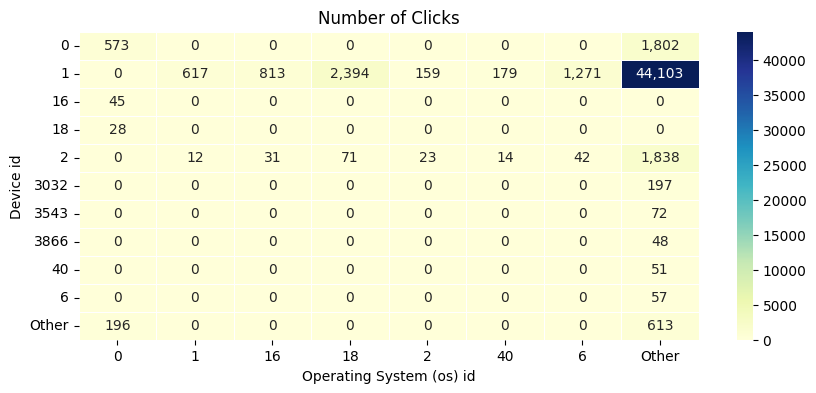

In [58]:
fig, ax = plt.subplots(figsize=(10, 4))
sb.heatmap(ct_device_os, annot=True, fmt=",",
            cmap="YlGnBu", cbar=True, linewidths=.5, ax=ax)
plt.ylabel("Device id")
plt.xlabel("Operating System (os) id")
plt.title("Number of Clicks")
plt.show()

#### Correlation Matrix

In [61]:
corr_matrix = df_corr.corr()

In [62]:
corr_matrix.shape

(9, 9)

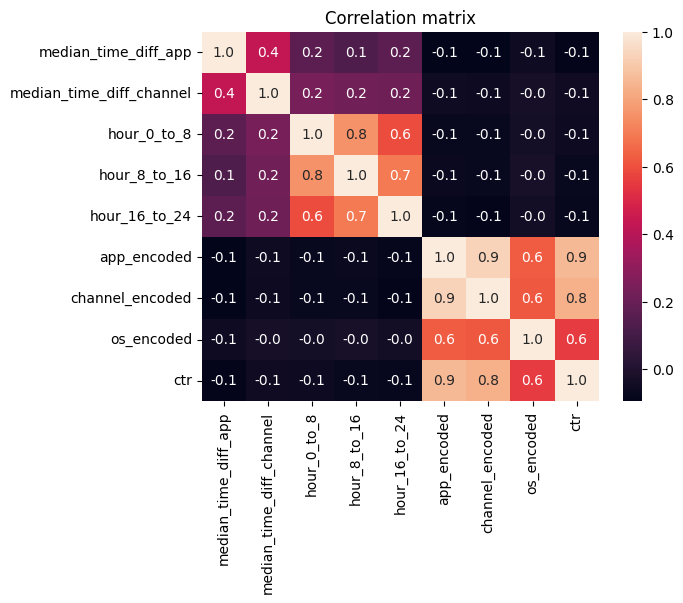

In [63]:
sb.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.title("Correlation matrix")
plt.show()

#### Crosstab - Clusters and Apps

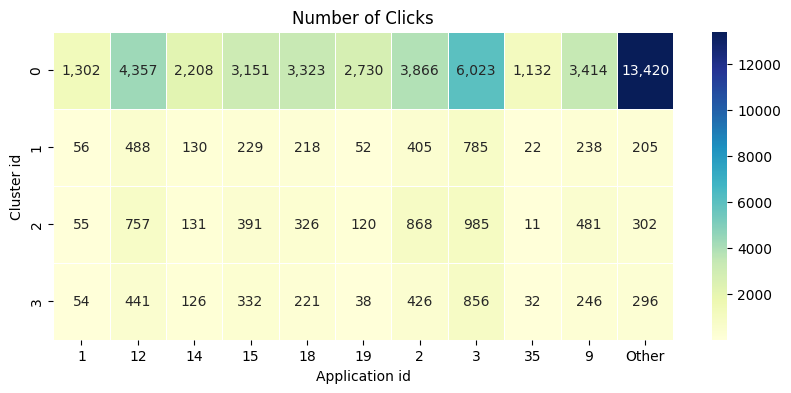

In [108]:
fig, ax = plt.subplots(figsize=(10, 4))
sb.heatmap(ct_clusters_app, annot=True, fmt=",",
            cmap="YlGnBu", cbar=True, linewidths=.7, ax=ax)
plt.ylabel("Cluster id")
plt.xlabel("Application id")
plt.title("Number of Clicks")
plt.show()

#### Crosstab - Clusters and Channel

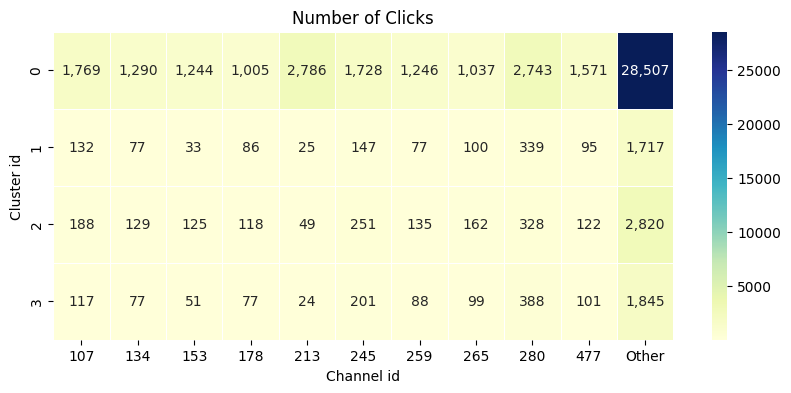

In [107]:
fig, ax = plt.subplots(figsize=(10, 4))
sb.heatmap(ct_clusters_channel, annot=True, fmt=",",
            cmap="YlGnBu", cbar=True, linewidths=.7, ax=ax)
plt.ylabel("Cluster id")
plt.xlabel("Channel id")
plt.title("Number of Clicks")
plt.show()

#### Cluster 2

In [66]:
cluster_2_df = df[df['clusters']==2]

In [67]:
cluster_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4427 entries, 10 to 55210
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ip                             4427 non-null   int64  
 1   app                            4427 non-null   int64  
 2   device                         4427 non-null   int64  
 3   os                             4427 non-null   int64  
 4   channel                        4427 non-null   int64  
 5   click_time                     4427 non-null   object 
 6   is_attributed                  4427 non-null   int64  
 7   click_date                     4427 non-null   object 
 8   median_time_diff_app           4427 non-null   float64
 9   median_time_diff_channel       4427 non-null   float64
 10  hour                           4427 non-null   int64  
 11  minute                         4427 non-null   int64  
 12  hour_0_to_8                    4427 non-null  

In [81]:
total_clicks_30_to_54 = cluster_2_df.query('total_clicks >= 25')

In [82]:
total_clicks_30_to_54.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 508 to 54951
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ip                             696 non-null    int64  
 1   app                            696 non-null    int64  
 2   device                         696 non-null    int64  
 3   os                             696 non-null    int64  
 4   channel                        696 non-null    int64  
 5   click_time                     696 non-null    object 
 6   is_attributed                  696 non-null    int64  
 7   click_date                     696 non-null    object 
 8   median_time_diff_app           696 non-null    float64
 9   median_time_diff_channel       696 non-null    float64
 10  hour                           696 non-null    int64  
 11  minute                         696 non-null    int64  
 12  hour_0_to_8                    696 non-null   

In [83]:
ct_ip_app = pd.crosstab(total_clicks_30_to_54['ip'], total_clicks_30_to_54['app'])

In [84]:
ct_ip_app

app,2,3,9,12,15,18,19
ip,,,,,,,
5314,33,41,34,35,27,0,27
5348,31,46,29,34,28,26,0
36183,25,0,0,0,0,0,0
53454,0,25,0,0,0,0,0
73487,0,51,32,53,0,0,0
73516,0,39,26,54,0,0,0


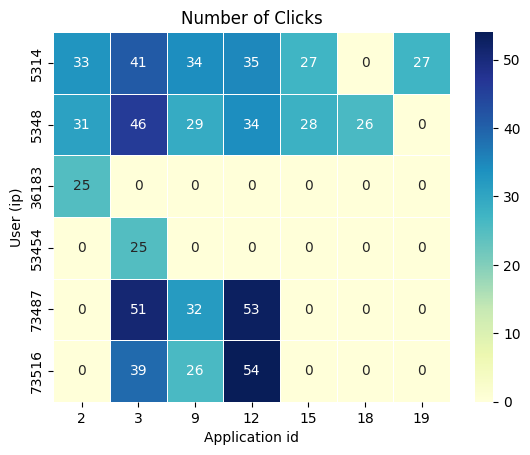

In [106]:
sb.heatmap(ct_ip_app, annot=True, fmt=",",
            cmap="YlGnBu", cbar=True, linewidths=.5)
plt.ylabel("User (ip)")
plt.xlabel("Application id")
plt.title("Number of Clicks")
plt.show()

### Click through rate

In [ ]:
df_ctr = df.query('ctr > 0 and ctr < 1')

In [ ]:
df_ctr[['hour', 'ctr']].head()

,hour,ctr
45930,0,0.5
45931,6,0.5
45974,10,0.5
45975,1,0.5
46026,6,0.5


<Axes: >

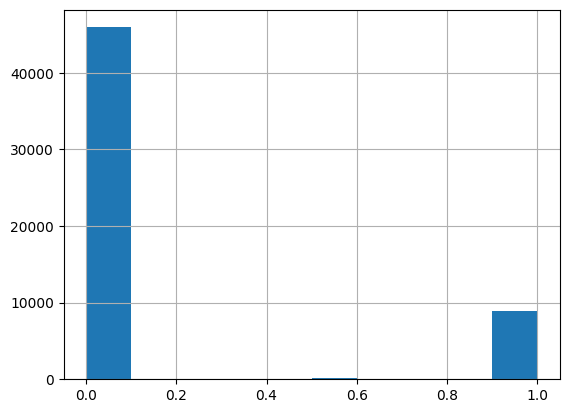

In [ ]:
df['ctr'].hist()

In [ ]:
click_count_by_app = df.groupby(['app'])['ip'].count()

In [ ]:
click_count_by_app.info()

<class 'pandas.core.series.Series'>
Int64Index: 180 entries, 0 to 538
Series name: ip
Non-Null Count  Dtype
--------------  -----
180 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [ ]:
click_count_by_app.info()

<class 'pandas.core.series.Series'>
Int64Index: 180 entries, 0 to 538
Series name: ip
Non-Null Count  Dtype
--------------  -----
180 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [ ]:
df_download = df.loc[df["is_attributed"] == 1]

In [ ]:
download_count_by_app = df_download.groupby(['app'])['ip'].count()

In [ ]:
download_count_by_app.info()

<class 'pandas.core.series.Series'>
Int64Index: 120 entries, 0 to 481
Series name: ip
Non-Null Count  Dtype
--------------  -----
120 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [ ]:
df_app_ctr = pd.DataFrame({
    "total_click_count":click_count_by_app,
    "download_count":download_count_by_app
})

In [ ]:
df_app_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 538
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_click_count  180 non-null    int64  
 1   download_count     120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [ ]:
df_app_ctr.isna().sum()

total_click_count     0
download_count       60
dtype: int64

In [ ]:
df_app_ctr.dropna(inplace=True)

In [ ]:
df_app_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 481
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_click_count  120 non-null    int64  
 1   download_count     120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


## Classification Results (including clusters)

In [110]:
knn = {"FN":33, "FP":15}
dt = {"FN":21, "FP":14}
rf = {"FN":32, "FP":6}

In [111]:
df_clf = pd.DataFrame({"K-NN":knn, "Decision Tree":dt, "Random Forest":rf})

In [112]:
df_clf

,K-NN,Decision Tree,Random Forest
FN,33,21,32
FP,15,14,6


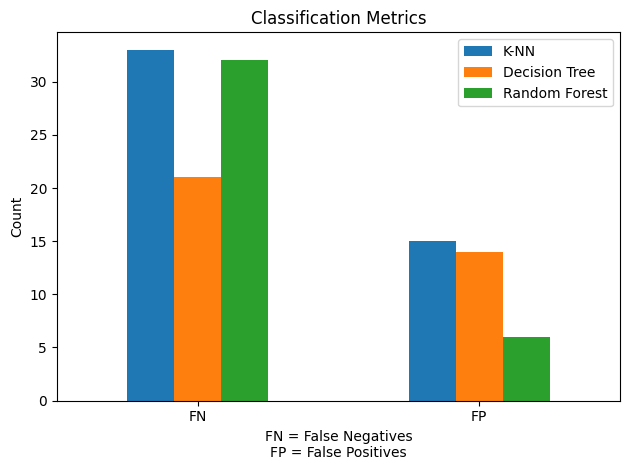

In [128]:
df_clf.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("FN = False Negatives\nFP = False Positives")
plt.title("Classification Metrics")
plt.tight_layout()
plt.show()

## References

> https://python-graph-gallery.com/13-percent-stacked-barplot/
>
> https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
>
> https://github.com/mwalbers1/Data-Analyst-Projects/blob/main/Communicate%20Data%20project/PISA%20Data%20Part%202.ipynb
>
> https://github.com/mwalbers1/Data-Analyst-Projects/blob/main/Investigate%20Dataset/Investigate_a_Dataset.ipynb
>
